
# Exercise 3 Decision boundary

The goal of this exercise is to learn to fit a logistic regression on simple examples and to understand how the algorithm separated the data from the different classes.  

## 1 dimension

First, we will start as usual with features data in 1 dimension. Use `make classification` from Scikit-learn to generate 100 data points:

```python
X,y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)
```

*Warning: The shape of X is not the same as the shape of y. You may need (for some questions) to reshape X using: `X.reshape(1,-1)[0]`.*

1. Plot the data using a scatter plot. The x-axis contains the feature and y-axis contains the target.

The plot should look like this:

![alt text][ex3q1]

[ex3q3]: images/day2/ex3/w2_day2_ex3_q3.png "Scatter plot"

2. Fit a Logistic Regression on the generated data using scikit learn. Print the coefficients of the Logistic Regression.

3. Add to the previous plot the fitted sigmoid and the 0.5 probability line. The plot should look like this:

![alt text][ex3q3]

[ex3q1]: images/day2/ex3/w2_day2_ex3_q1.png "Scatter plot + Logistic regression"

4.  Create a function `predict_probability` that takes as input the data point and the coefficients and that returns the predicted probability. As a reminder, the probability is given by: p(x) = 1/(1+ exp(-(coef*x + intercept))).  Check you have the same results as the method `predict_proba` from Scikit-learn.

```python
def predict_probability(coefs, X):
    '''
    coefs is a list that contains a and b: [coef, intercept]
    X is the features set 

    Returns probability of X 
    '''
    #TODO
    probabilities = 

    return probabilities
```

5. Create a function  `predict_class` that takes as input the data point and the coefficients and that returns the predicted class. Check you have the same results as the class method `predict` output on the same data.

6. On the plot add the predicted class. The plot should look like this (the predicted class is shifted a bit to make the plot more understandable, but obviously the predicted class is 0 or 1, not 0.1 or 0.9)
The plot should look like this:

![alt text][ex3q6]

[ex3q6]: images/day2/ex3/w2_day2_ex3_q5.png "Scatter plot + Logistic regression + predictions"

## 2 dimensions

Now, let us repeat this process on 2-dimensional data. The goal is to focus on the decision boundary and to understand how the Logistic Regression create a line that separates the data. The code to plot the decision boundary is provided, however it is important to understand the way it works.

- Generate 500 data points using:

```python
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_samples=250,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.05,
                           class_sep=3, 
                           random_state=43)
```

7. Fit the Logistic Regression on X and y and use the code below to plot the fitted sigmoid on the data set.

The plot should look like this:

![alt text][ex3q7]

[ex3q7]: images/day2/ex3/w2_day2_ex3_q6.png "Logistic regression decision boundary"

```python
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
#if needed change the line below
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

```

The plot should look like this:

- https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression


Intercept: -0.9838557389387971
Coefficient: 1.1886607470935275


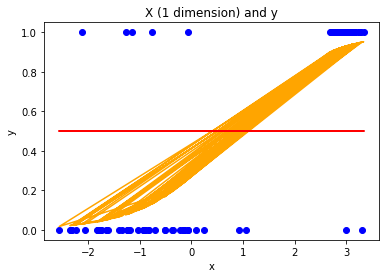

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X,y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

# 1.
plt.scatter(X, y, color='blue')
plt.title('X (1 dimension) and y')
plt.xlabel('x')
plt.ylabel('y')

# 2.
clf = LogisticRegression(random_state=0).fit(X, y)
coef = clf.coef_[0][0]
inter = clf.intercept_[0]
# Calculate the intercept and gradient of the decision boundary.

# testing
print('Intercept:', inter)
print('Coefficient:', coef)

# 3.
sigmoid= 1 / (1 + np.exp(-(coef*X + inter)))
# X = X.reshape(1,-1)[0]
plt.plot(X, sigmoid, color='orange')

probability_line = np.full(shape=100, fill_value=0.5)
plt.plot(X, probability_line, color='red')


In [103]:
# 4.
def predict_probability(coefs, X):
    # p(x) = 1/(1+ exp(-(coef*x + intercept)))
    probabilities = 1 / (1 + np.exp(-(coefs[0]*X + coefs[1])))

    return probabilities

# testing
print(predict_probability([coef, inter], X.reshape(1,-1)[0]))
print('equal to')
print(clf.predict_proba(X)[:,1])

[0.16855576 0.93810815 0.08051049 0.92083715 0.93520812 0.92546684
 0.07576046 0.11206416 0.93419423 0.94221002 0.04069668 0.02217977
 0.0520942  0.25531821 0.12300093 0.93030777 0.02521797 0.92710964
 0.03134186 0.02901377 0.90879909 0.29300139 0.09844986 0.92923953
 0.91787911 0.90727816 0.92420997 0.94002495 0.92033514 0.08342251
 0.56917544 0.93340569 0.04408432 0.11289147 0.04122182 0.95031481
 0.07965447 0.25671796 0.94861041 0.11079507 0.90153688 0.04266255
 0.04463706 0.24284228 0.1955845  0.01745011 0.93540745 0.91519073
 0.04980959 0.93094049 0.23623781 0.93932531 0.9215783  0.22221559
 0.13185808 0.19425263 0.92732264 0.93234878 0.33533806 0.93931791
 0.93042341 0.91441871 0.06548752 0.02291485 0.9079704  0.93037939
 0.91606239 0.94810616 0.92262234 0.0786998  0.14026148 0.92641923
 0.92293145 0.11235863 0.92796108 0.94568015 0.07002604 0.04278977
 0.10895243 0.12186317 0.93265802 0.90843635 0.04469049 0.94018697
 0.52940166 0.9199021  0.95195507 0.93784336 0.02329644 0.9040

In [104]:
# 5.
def predict_class(coefs, X):
    # = 1 / (1 + np.exp(-(coef*X + inter)))
    predicted = 1 / (1 + np.exp(-(coefs[0]*X + coefs[1])))
    return predicted.round()

print(predict_class([coef, inter], X.reshape(1,-1)[0]))
print('equal to')
print(clf.predict(X))

[0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 1.]
equal to
[0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1]


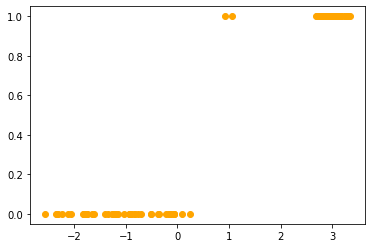

In [105]:
# 6
plt.scatter(X, clf.predict(X), color='orange')
plt.show()


In [156]:
# 2 dimensions
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_samples=250,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.05,
                           class_sep=3, 
                           random_state=43)

# 7.
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

# if needed change the line below
probs = clf.predict_proba(grid.reshape(-1, 1)[:1000000])[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")


[None, (-5.0, 5.0), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]